## Polynomial Regression
    ## Source: IBM Coursera data science specialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = 'C:\\Users\\Rakib\\Downloads\\Completed Projects -- Machine Learning IBM\\Coursera Data Sets\\FuelConsumption.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [8]:
# let's use some features for regression
data =  df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


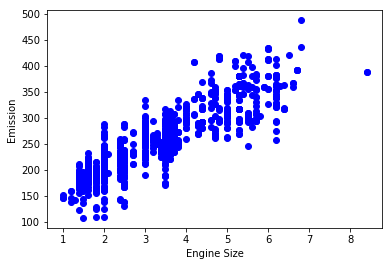

In [9]:
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue')

plt.ylabel("Emission")
plt.xlabel("Engine Size")
plt.show()

In [11]:
#split the data set into train and test
msk = np.random.rand(len(df)) < 0.8
train = data[msk]
test = data[~msk]

In [12]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
train_x = np.asanyarray(train[['ENGINESIZE']]) 
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [14]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.4 ,   5.76],
       [  1.  ,   1.5 ,   2.25],
       ..., 
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24]])

In [15]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [16]:
# Train model
train_y_ = LR.fit(train_x_poly, train_y)

In [17]:
# The Coefficients 
print('Coefficients: ', LR.coef_)
print('Intercept: ', LR.intercept_)

Coefficients:  [[  0.          51.28775187  -1.64473846]]
Intercept:  [ 106.00820428]


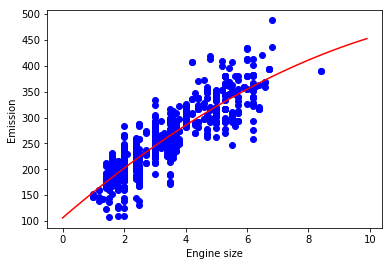

In [22]:
# scatter plot of originial data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

# Polynomial Regression line
XX = np.arange(0.0, 10.0, 0.1)
yy = LR.intercept_[0]+ LR.coef_[0][1]*XX+ LR.coef_[0][2]*np.power(XX, 2)

#Plot the line
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation of the Model

In [23]:
from sklearn.metrics import r2_score

In [24]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = LR.predict(test_x_poly)

In [27]:
print("R2 Score: %.2f" % r2_score(test_y_, test_y))

R2 Score: 0.63


In [28]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

Mean absolute error: 25.10
Residual sum of squares (MSE): 1076.78
